### PROBLEM STATEMENT
Uncovering product popularity and customer engagement
using the number of reviews and average rating as the main signals.


CRISP- DM Framework

### Data Understanding/ Exploration

In [1]:
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sb
import io

%matplotlib inline

In [2]:
# read in the data
Babyproducts_df = pd.read_csv('Datasets/https___www.jumia.com.ng_baby-products_.csv')
Fashion_df = pd.read_csv('Datasets/https___www.jumia.com.ng_category-fashion-by-jumia_.csv')
Computing_df = pd.read_csv('Datasets/https___www.jumia.com.ng_computing_all-products_#catalog-listing.csv')
Electronics_df = pd.read_csv('Datasets/https___www.jumia.com.ng_electronics_.csv')
Groceries_df = pd.read_csv('Datasets/https___www.jumia.com.ng_groceries_.csv')
Healthbeauty_df = pd.read_csv('Datasets/https___www.jumia.com.ng_health-beauty_.csv')
Homeoffice_df = pd.read_csv('Datasets/https___www.jumia.com.ng_home-office_.csv')
Appliances_df = pd.read_csv('Datasets/https___www.jumia.com.ng_mlp-appliances_.csv')
Phonestablets_df = pd.read_csv('Datasets/https___www.jumia.com.ng_phones-tablets_.csv')
Videogames_df = pd.read_csv('Datasets/https___www.jumia.com.ng_video-games_.csv')

In [3]:
from io import StringIO

In [4]:
df1 = pd.read_csv('Datasets/https___www.jumia.com.ng_baby-products_.csv')
df2 = pd.read_csv('Datasets/https___www.jumia.com.ng_category-fashion-by-jumia_.csv')
df3 = pd.read_csv('Datasets/https___www.jumia.com.ng_computing_all-products_#catalog-listing.csv')
df4 = pd.read_csv('Datasets/https___www.jumia.com.ng_electronics_.csv')
df5 = pd.read_csv('Datasets/https___www.jumia.com.ng_groceries_.csv')
df6 = pd.read_csv('Datasets/https___www.jumia.com.ng_health-beauty_.csv')
df7 = pd.read_csv('Datasets/https___www.jumia.com.ng_home-office_.csv')
df8 = pd.read_csv('Datasets/https___www.jumia.com.ng_mlp-appliances_.csv')
df9 = pd.read_csv('Datasets/https___www.jumia.com.ng_phones-tablets_.csv')
df10 = pd.read_csv('Datasets/https___www.jumia.com.ng_video-games_.csv')

In [5]:
df1.head()

,Name,Current Price,Original Price,Discount,Brand,Rating,Review Count,Image URL,Product URL
0,HOT Automatic Portable Silicon Milk Pump Wirel...,19800,24750.0,20%,Generic,4.1,84.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/generic-hot-automatic...
1,Catpapa 0-5Years Baby Girls Long Sleeve Tees W...,8000,20800.0,62%,NaN,3.7,13.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/catpapa-0-5years-baby...
2,Catpapa 3Pcs 0-24Months Baby Girls Tees With S...,7680,20800.0,63%,NaN,5.0,2.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/catpapa-3pcs-0-24mont...
3,Electric Duck Slide Track With Lights And Music,26800,28800.0,7%,Generic,NaN,NaN,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/generic-electric-duck...
4,2 In 1 Absorbent Towels -Big And Small,6499,NaN,NaN,Generic,5.0,3.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/2-in-1-absorbent-towe...


In [6]:
df2.head()

,Name,Current Price,Original Price,Discount,Brand,Rating,Review Count,Image URL,Product URL
0,Mateamoda 3 In 1 Women Bag Crossbody Bag Handb...,13816,35843,61%,Mateamoda,3.4,2147.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/mateamoda-3-in-1-wome...
1,4 In 1 Boxers For Men (Medium And Small WAISTS...,2800,4500,38%,NaN,3.1,591.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/fashion-4-in-1-boxers...
2,Six Pieces-in-1 Quality Ankle Socks,1580,4000,61%,NaN,4.1,10064.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/fashion-six-pieces-in...
3,TOUPHY Men's Fashion Sneakers Running Shoes,9025,33328,73%,NaN,4.0,773.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/touphy-mens-fashion-s...
4,TOUPHY T-Shirts +Shorts 100% Cotton Men's Shor...,9025,10832 - 30000,70%,NaN,3.4,1702.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/touphy-t-shirts-short...


In [7]:
df3.head()

,Computing,Current Price,Original Price,Discount,Brand,Rating,Review Count,Image URL,Product URL
0,GUEETON 128GB Metal OTG Usb Flash Drive Waterp...,10949,NaN,NaN,GUEETON,3.6,2653.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/gueeton-128gb-metal-o...
1,EAGEAT 10 Speed Adjustable Laptop Stand+phone ...,3425,6140.0,44%,NaN,4.1,2109.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/eageat-10-speed-adjus...
2,GUEETON Ultra-thin Wireless Mouse 2.4G Bluetoo...,3925,19200.0,80%,GUEETON,4.3,4813.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/gueeton-ultra-thin-wi...
3,EAGEAT Wireless 2.4GHz Mice Rechargeable Mute,3856,24992.0,85%,EAGEAT,4.5,304.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/wireless-2.4ghz-mice-...
4,MTN 4G LTE MiFi - M36 + Free 30GB Data Bonus O...,14550,15000.0,3%,MTN,4.5,15.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/mtn-4g-lte-mifi-m36-f...


In [8]:
df4.head()

,Name,Current Price,Original Price,Discount,Brand,Rating,Review Count,Image URL,Product URL
0,Hikers 32'' Frameless Android Smart HD LED TV ...,113400,144949.0,22%,NaN,4.0,753.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/hikers-32-frameless-a...
1,Hikers 32'' Inches Frameless HD LED TV-Black,92780,122640.0,24%,Hikers,4.2,189.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/hikers-32-inches-fram...
2,Sonivia Powerful Bluetooth Home Theater with e...,33990,35715.0,5%,Generic,4.0,725.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/sonivia-bluetooth-hom...
3,Hikers 43'' Inch Frameless Android Smart FHD L...,195875,215544.0,9%,NaN,4.2,331.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/hikers-43-inch-framel...
4,Zealot S67 Portable 75W Wireless Bluetooth Spe...,59999,75000.0,20%,Zealot,4.3,1037.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/s67-waterproof-blueto...


In [9]:
df5.head()

,Name,Current Price,Original Price,Discount,Brand,Rating,Review Count,Image URL,Product URL
0,WAW ALL PURPOSE CLEANER ROSE 1Litre,2300,2530.0,9%,WAW,3.7,11,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/waw-all-purpose-clean...
1,Knorr Beef Bouillon Seasoning Cubes 50X8g Trip...,5590,6265.0,11%,Knorr,4.2,202,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/knorr-beef-bouillon-s...
2,Big Bull Rice 50Kg,73800,80000.0,8%,Big Bull,3.6,17,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/big-bull-rice-50kg-39...
3,William Lawson's Finest Blended Scotch Whisky ...,12670,14190.0,11%,William Lawson's,4.4,351,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/william-lawsons-fines...
4,Hennessy VSOP Cognac - 750ml,93474,NaN,NaN,Hennessy,4.7,3,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/hennessy-vsop-cognac-...


In [10]:
df6.head()

,Name,Current Price,Original Price,Discount,Brand,Rating,Review Count,Image URL,Product URL
0,Vaseline Blueseal Original Petroleum Jelly 50m...,1085,1165.0,7%,Vaseline,4.0,72,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/vaseline-blueseal-ori...
1,Dr Teal's Foam Bath Glow & Radiance Vitamin C ...,10365,11142.0,7%,Dr Teal's,4.3,66,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/dr-teals-foam-bath-gl...
2,Axe Adrenalin Mandarin & Sandalwood Scent 48h ...,6020,6475.0,7%,Axe,4.5,30,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/axe-adrenalin-mandari...
3,Dove Men+Care Cool Fresh Aerosol Antiperspiran...,5170,NaN,NaN,Dove,4.3,12,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/dove-mencare-cool-fre...
4,Dettol Antiseptic Liquid Disinfectant 750ml,13635,14610.0,7%,Dettol,4.6,84,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/antiseptic-liquid-dis...


In [11]:
df7.head()

,Name,Current Price,Original Price,Discount,Brand,Rating,Review Count,Image URL,Product URL
0,Nexus 5.5kg Twin Tub Washing Machine (NX-WM-5SAK),141700,163914.0,14%,Nexus,4.3,570,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/nexus-5.5kg-twin-tub-...
1,Glamstar 1.5HP Inverter Split Copper Air Condi...,381600,470880.0,19%,Glamstar,4.6,209,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/1.5hp-split-copper-in...
2,Elegant Modern 3D Pattern Large Center Rug- 12...,18995,30000.0,37%,Generic,3.8,187,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/generic-elegant-moder...
3,Haier Thermocool 146 Litres Chest Freezer (HTF...,355370,412229.0,14%,Haier Thermocool,4.4,134,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/haier-thermocool-146-...
4,Syinix 2.2L Electric Kettle - Silver SKE22U1,6100,6369.0,4%,Syinix,4.0,2657,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/syinix-2.2l-electric-...


In [12]:
df8.head()

,Name,Current Price,Original Price,Discount,Brand,Rating,Review Count,Image URL,Product URL
0,Nexus 5.5kg Twin Tub Washing Machine (NX-WM-5SAK),141700,163914.0,14%,Nexus,4.3,570,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/nexus-5.5kg-twin-tub-...
1,Glamstar 1.5HP Inverter Split Copper Air Condi...,381600,470880.0,19%,Glamstar,4.6,209,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/1.5hp-split-copper-in...
2,Haier Thermocool 146 Litres Chest Freezer (HTF...,355370,412229.0,14%,Haier Thermocool,4.4,134,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/haier-thermocool-146-...
3,Syinix 2.2L Electric Kettle - Silver SKE22U1,6100,6369.0,4%,Syinix,4.0,2657,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/syinix-2.2l-electric-...
4,SILVER CREST 2L Industrial 8500W Food Crusher ...,24990,27036.0,8%,SILVER CREST,3.9,10751,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/2l-industrial-8500w-f...


In [13]:
df9.head()

,Name,Current Price,Original Price,Discount,Brand,Rating,Review Count,Image URL,Product URL
0,"Infinix Hot 50 Pro+ 6.78"" 8GB RAM/128GB ROM An...",256317,NaN,NaN,Infinix,4.6,47.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/infinix-hot-50-pro-6....
1,Ace Elec 20000 MAh Utra Slim Portable Power Bank,7294,NaN,NaN,Ace Elec,3.7,47707.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/20000-mah-utra-slim-p...
2,EASYPIE EasyPie 20000mAh Dual Fast Charge 64W ...,7392,8896.0,17%,EASYPIE,3.6,1742.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/easypie-easypie-20000...
3,VIC ♛20000mAh Power Banks 74Wh Portable Charge...,6971,19107.0,64%,NaN,3.4,3579.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/vic-20000mah-power-ba...
4,Ace Elec 50000 MAh Power Banks With LED Light ...,25882,NaN,NaN,Ace Elec,3.5,15978.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/ace-elec-50000-mah-po...


In [14]:
df10.head()

,Name,Current Price,Original Price,Discount,Brand,Rating,Review Count,Image URL,Product URL
0,Original Wireless Controller Pad For Ps4-Green...,15500,65000.0,76%,Generic,4.3,254.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/generic-original-wire...
1,Finger Thumb Sleeve Gloves For Gamer Non-scrat...,4268,4500.0,5%,NaN,3.8,29.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/generic-finger-thumb-...
2,PS4 Controller Dualshock 4 Wireless Game Pad ...,13190,25790.0,49%,Generic,4.2,176.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/generic-ps4-controlle...
3,Sony PS4 Pad - PlayStation 4 DualShock 4 Wirel...,13400,13450.0,1%,Sony,4.3,290.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/sony-ps4-pad-playstat...
4,Sony Ps4 Console 500 GB WITH 2 CONTROLLER,239500,239550.0,1%,Sony,4.1,43.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/sony-ps4-console-500-...


In [15]:
comb_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10], ignore_index = True)

In [16]:
comb_df.head()

,Name,Current Price,Original Price,Discount,Brand,Rating,Review Count,Image URL,Product URL,Computing
0,HOT Automatic Portable Silicon Milk Pump Wirel...,19800,24750.0,20%,Generic,4.1,84.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/generic-hot-automatic...,NaN
1,Catpapa 0-5Years Baby Girls Long Sleeve Tees W...,8000,20800.0,62%,NaN,3.7,13.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/catpapa-0-5years-baby...,NaN
2,Catpapa 3Pcs 0-24Months Baby Girls Tees With S...,7680,20800.0,63%,NaN,5.0,2.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/catpapa-3pcs-0-24mont...,NaN
3,Electric Duck Slide Track With Lights And Music,26800,28800.0,7%,Generic,NaN,NaN,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/generic-electric-duck...,NaN
4,2 In 1 Absorbent Towels -Big And Small,6499,NaN,NaN,Generic,5.0,3.0,https://ng.jumia.is/unsafe/fit-in/300x300/filt...,https://www.jumia.com.ng/2-in-1-absorbent-towe...,NaN


In [17]:
df1.shape

(40, 9)

In [18]:
df2.shape

(52, 9)

In [19]:
df3.shape

(52, 9)

In [20]:
df4.shape

(52, 9)

In [21]:
df5.shape

(40, 9)

In [22]:
df6.shape

(40, 9)

In [23]:
df7.shape

(40, 9)

In [24]:
df8.shape

(40, 9)

In [25]:
df9.shape

(52, 9)

In [26]:
df10.shape

(50, 9)

In [27]:
comb_df.shape

(458, 10)

In [28]:
comb_df.columns

Index(['Name', 'Current Price', 'Original Price', 'Discount', 'Brand',
       'Rating', 'Review Count', 'Image URL', 'Product URL', 'Computing'],
      dtype='object')

In [29]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            406 non-null    object 
 1   Current Price   458 non-null    object 
 2   Original Price  382 non-null    object 
 3   Discount        382 non-null    object 
 4   Brand           319 non-null    object 
 5   Rating          398 non-null    float64
 6   Review Count    398 non-null    float64
 7   Image URL       458 non-null    object 
 8   Product URL     458 non-null    object 
 9   Computing       52 non-null     object 
dtypes: float64(2), object(8)
memory usage: 35.9+ KB


In [30]:
df_clean = comb_df.copy()
def clean_data(comb_df, category_name):
    df_clean = comb_df.drop_duplicates().copy()
    df_clean['Category'] = category_name

In [31]:
for col in ['Current Price', 'Original Price']:
        if col in df_clean.columns:
            
            df_clean[col] = pd.to_numeric(
                df_clean[col].astype(str).str.replace(',', ''), 
                errors='coerce'
            )
            if 'Discount' in df_clean.columns:
                df_clean['Discount'] = (
                    df_clean['Discount']
                    .astype(str)
                    .str.replace('%', '')
                    .str.replace('N/A', '0')
                )
                df_clean['Discount'] = pd.to_numeric(df_clean['Discount'], errors='coerce').fillna(0)
                
                print("Data cleaned successfully!")
                print(df_clean)
                print("\nData types:")
                print(df_clean.dtypes)

Data cleaned successfully!
                                                  Name  Current Price  \
0    HOT Automatic Portable Silicon Milk Pump Wirel...        19800.0   
1    Catpapa 0-5Years Baby Girls Long Sleeve Tees W...         8000.0   
2    Catpapa 3Pcs 0-24Months Baby Girls Tees With S...         7680.0   
3      Electric Duck Slide Track With Lights And Music        26800.0   
4               2 In 1 Absorbent Towels -Big And Small         6499.0   
..                                                 ...            ...   
453                                Sony Ps5 Controller       130000.0   
454  Xbox One/One S Controller Charger [Dual Slot]/...        10900.0   
455     Sony PS4 Pad New Dual Shock 4 - Latest Edition        14990.0   
456  Dobe Xbox One Vertical Cooling Stand &ncontrol...         9980.0   
457                       Sony PS4 WIRELESS CONTROLLER        20000.0   

    Original Price  Discount    Brand  Rating  Review Count  \
0          24750.0      20.0  Gen

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            406 non-null    object 
 1   Current Price   445 non-null    float64
 2   Original Price  378 non-null    float64
 3   Discount        458 non-null    float64
 4   Brand           319 non-null    object 
 5   Rating          398 non-null    float64
 6   Review Count    398 non-null    float64
 7   Image URL       458 non-null    object 
 8   Product URL     458 non-null    object 
 9   Computing       52 non-null     object 
dtypes: float64(5), object(5)
memory usage: 35.9+ KB


In [33]:
df_clean.describe() 

,Current Price,Original Price,Discount,Rating,Review Count
count,445.000000,3.780000e+02,458.000000,398.000000,398.000000
mean,52554.406742,6.096890e+04,28.255459,4.079899,992.527638
std,126204.507732,1.259886e+05,23.655954,0.425862,3038.298182
min,354.000000,8.700000e+02,0.000000,2.300000,1.000000
25%,6700.000000,1.022550e+04,6.000000,3.800000,36.000000
50%,12745.000000,2.009300e+04,25.000000,4.100000,185.000000
75%,28000.000000,4.470000e+04,46.000000,4.300000,701.750000
max,980000.000000,1.170000e+06,92.000000,5.000000,47707.000000


In [34]:
measures = [i for i in df_clean.select_dtypes(include=['int64', 'float64']).columns]
dimensions = [i for i in df_clean.select_dtypes(include=['object']).columns]

In [35]:
measures

['Current Price', 'Original Price', 'Discount', 'Rating', 'Review Count']

In [36]:
dimensions

['Name', 'Brand', 'Image URL', 'Product URL', 'Computing']

In [37]:
def categorize_product(name):
    name = str(name).lower()
    
    # Baby products
    if any(word in name for word in ['baby', 'infant', 'toddler', 'diaper', 'breast', 'pump', 'stroller']):
        return 'Baby Care'
    elif any(word in name for word in ['clothes', 'bodysuit', 'dress', 'shirt', 'onesie', 'outfit']):
        return 'Baby Clothing'
    
    # Fashion
    elif any(word in name for word in ['shirt', 't-shirt', 'blouse', 'top', 'dress', 'skirt']):
        return 'Clothing'
    elif any(word in name for word in ['shoe', 'sneaker', 'boot', 'footwear', 'loafer']):
        return 'Footwear'
    elif any(word in name for word in ['bag', 'purse', 'backpack', 'wallet']):
        return 'Bags & Accessories'
    elif any(word in name for word in ['watch', 'belt', 'jewelry']):
        return 'Accessories'
    
    # Computing
    elif any(word in name for word in ['laptop', 'computer', 'pc', 'macbook']):
        return 'Computers'
    elif any(word in name for word in ['mouse', 'keyboard', 'usb', 'flash', 'drive']):
        return 'Computer Accessories'
    elif any(word in name for word in ['tablet', 'ipad']):
        return 'Tablets'
    
    # Electronics
    elif any(word in name for word in ['tv', 'television', 'smart tv']):
        return 'TVs'
    elif any(word in name for word in ['headphone', 'earphone', 'earbud', 'speaker', 'soundbar']):
        return 'Audio'
    elif any(word in name for word in ['camera', 'security', 'surveillance']):
        return 'Cameras & Security'
    
    # Groceries
    elif any(word in name for word in ['rice', 'pasta', 'noodle', 'grain']):
        return 'Staples'
    elif any(word in name for word in ['whisky', 'wine', 'beer', 'alcohol', 'spirit']):
        return 'Beverages & Alcohol'
    elif any(word in name for word in ['seasoning', 'spice', 'cube', 'knorr', 'maggi']):
        return 'Seasonings'
    
    # Health & Beauty
    elif any(word in name for word in ['shampoo', 'conditioner', 'lotion', 'cream', 'serum']):
        return 'Personal Care'
    elif any(word in name for word in ['clipper', 'trimmer', 'razor', 'hair']):
        return 'Grooming'
    elif any(word in name for word in ['perfume', 'deodorant', 'fragrance']):
        return 'Fragrances'
    
    # Home & Office
    elif any(word in name for word in ['furniture', 'chair', 'table', 'desk', 'sofa']):
        return 'Furniture'
    elif any(word in name for word in ['kitchen', 'cooker', 'blender', 'kettle', 'fridge', 'freezer']):
        return 'Kitchen Appliances'
    elif any(word in name for word in ['fan', 'ac', 'air conditioner']):
        return 'Cooling'
    
    # Phones & Tablets
    elif any(word in name for word in ['phone', 'smartphone', 'mobile']):
        return 'Mobile Phones'
    elif any(word in name for word in ['power bank', 'charger', 'battery']):
        return 'Phone Accessories'
    elif any(word in name for word in ['smart watch', 'watch', 'wearable']):
        return 'Wearables'
    
    # Video Games
    elif any(word in name for word in ['ps4', 'ps5', 'playstation', 'xbox', 'controller', 'console']):
        return 'Gaming Consoles'
    elif any(word in name for word in ['game', 'gaming', 'controller', 'pad']):
        return 'Gaming Accessories'
    
    return 'Other'

# Apply categorization
df_clean['Subcategory'] = df_clean['Name'].apply(categorize_product)

# Check distribution
print("Subcategory distribution:")
print(df_clean['Subcategory'].value_counts())

Subcategory distribution:
Subcategory
Other                   111
Cooling                  65
Baby Care                32
Gaming Consoles          31
Kitchen Appliances       24
Footwear                 21
Audio                    19
TVs                      18
Baby Clothing            18
Furniture                14
Personal Care            13
Accessories              12
Computers                11
Cameras & Security       10
Grooming                  9
Clothing                  8
Seasonings                7
Phone Accessories         7
Computer Accessories      7
Mobile Phones             6
Staples                   6
Bags & Accessories        4
Fragrances                2
Beverages & Alcohol       2
Gaming Accessories        1
Name: count, dtype: int64


In [38]:
print("Available columns:", df_clean.columns.tolist())

# Find the correct column name for category
category_col = None
for col in df_clean.columns:
    if 'category' in col.lower():
        category_col = col
        break

if category_col:
    print(f"Using category column: {category_col}")
    
    # Calculate metrics by category
    category_stats = df_clean.groupby(category_col).agg({
        'Review Count': ['count', 'mean', 'sum'],
        'Rating': 'mean',
        'Current Price': 'mean'
    }).round(2)
    
    # Flatten the multi-level column index
    category_stats.columns = ['Product Count', 'Avg Reviews', 'Total Reviews', 'Avg Rating', 'Avg Price']
    category_stats = category_stats.reset_index()
    
    print("\nCategory Statistics:")
    print(category_stats)
else:
    print("No category column found. Creating one for demonstration...")
    
    # Create a simple category column based on price ranges for demonstration
    df_clean['Category'] = pd.cut(df_clean['Current Price'], 
                                 bins=3, 
                                 labels=['Budget', 'Mid-Range', 'Premium'])
    
    # Now calculate metrics
    category_stats = df_clean.groupby('Category').agg({
        'Review Count': ['count', 'mean', 'sum'],
        'Rating': 'mean',
        'Current Price': 'mean'
    }).round(2)
    
    category_stats.columns = ['Product Count', 'Avg Reviews', 'Total Reviews', 'Avg Rating', 'Avg Price']
    category_stats = category_stats.reset_index()
    
    print("\nCategory Statistics:")
    print(category_stats)

Available columns: ['Name', 'Current Price', 'Original Price', 'Discount', 'Brand', 'Rating', 'Review Count', 'Image URL', 'Product URL', 'Computing', 'Subcategory']
Using category column: Subcategory

Category Statistics:
             Subcategory  Product Count  Avg Reviews  Total Reviews  \
0            Accessories              8       938.25         7506.0   
1                  Audio             16       520.81         8333.0   
2              Baby Care             31        37.35         1158.0   
3          Baby Clothing             10       593.20         5932.0   
4     Bags & Accessories              4       687.50         2750.0   
5    Beverages & Alcohol              2       186.00          372.0   
6     Cameras & Security              2        14.00           28.0   
7               Clothing              6       852.33         5114.0   
8   Computer Accessories              5       494.80         2474.0   
9              Computers             10       302.50         3025.0

In [42]:
def safe_category_analysis(df, category_col=None):
    """
    Safely perform category analysis with error handling
    """
    # Make a copy to avoid modifying original
    df_analysis = df.copy()
    
    # Handle missing category column
    if category_col is None or category_col not in df_analysis.columns:
        print("Category column not found or not specified. Creating one...")
        df_analysis['Category'] = df_analysis['Brand'].apply(
            lambda x: 'Electronics' if pd.notna(x) and any(brand in str(x) for brand in ['Nexus', 'Glamstar', 'Syinix', 'Hisense']) 
            else 'Home Appliances' if pd.notna(x) and any(brand in str(x) for brand in ['SILVER CREST', 'HANSEN', 'Binatone']) 
            else 'Other'
        )
        category_col = 'Category'
    
    # Check for required analysis columns
    analysis_cols = []
    if 'Review Count' in df_analysis.columns:
        analysis_cols.append('Review Count')
    if 'Rating' in df_analysis.columns:
        analysis_cols.append('Rating')
    if 'Current Price' in df_analysis.columns:
        analysis_cols.append('Current Price')
    
    if not analysis_cols:
        print("No analysis columns available.")
        return None
    
    # Build aggregation dictionary
    agg_dict = {}
    if 'Review Count' in analysis_cols:
        agg_dict['Review Count'] = ['count', 'mean', 'sum']
    if 'Rating' in analysis_cols:
        agg_dict['Rating'] = 'mean'
    if 'Current Price' in analysis_cols:
        agg_dict['Current Price'] = 'mean'
    
    # Perform analysis
    try:
        category_stats = df_analysis.groupby(category_col).agg(agg_dict).round(2)
        
        # Flatten column names
        flat_columns = [category_col]
        for col in category_stats.columns.levels[0]:
            if col == 'Review Count':
                flat_columns.extend(['Product Count', 'Avg Reviews', 'Total Reviews'])
            elif col == 'Rating':
                flat_columns.append('Avg Rating')
            elif col == 'Current Price':
                flat_columns.append('Avg Price')
        
        category_stats.columns = flat_columns[1:]
        category_stats = category_stats.reset_index()
        
        return category_stats
        
    except Exception as e:
        print(f"Error during analysis: {e}")
        return None

# Use the safe function
category_stats = safe_category_analysis(df_clean)

if category_stats is not None:
    print("Category Analysis Successful!")
    print(category_stats)
else:
    print("Category analysis failed.")

Category column not found or not specified. Creating one...
Category Analysis Successful!
          Category  Product Count  Avg Reviews  Total Reviews  Avg Rating  \
0      Electronics             17      1019.59        17333.0        4.21   
1  Home Appliances             22      2620.18        57644.0        4.03   
2            Other            359       891.50       320049.0        4.08   

   Avg Price  
0  107770.47  
1   21417.91  
2   51929.60  


In [43]:
print(category_stats.columns)

Index(['Category', 'Product Count', 'Avg Reviews', 'Total Reviews',
       'Avg Rating', 'Avg Price'],
      dtype='object')


In [49]:
# Setting up visualization style
plt.style.use('default')
sb.set_palette("husl")

# Creating DataFrame
df_clean = pd.DataFrame

# Data cleaning function
def clean_data(df):
    
    df_clean = df.copy()
    
    # Cleaning price columns
    for col in ['Current Price', 'Original Price']:
        if col in df_clean.columns:
            # Remove commas and convert to numeric
            df_clean[col] = pd.to_numeric(
                df_clean[col].astype(str).str.replace(',', ''), 
                errors='coerce'
            )
    
    # Cleaning discount column
    if 'Discount' in df_clean.columns:
        df_clean['Discount'] = (
            df_clean['Discount']
            .astype(str)
            .str.replace('%', '')
            .str.replace('N/A', '0')
        )
        df_clean['Discount'] = pd.to_numeric(df_clean['Discount'], errors='coerce').fillna(0)
    
    # Cleaning rating and review count
    if 'Rating' in df_clean.columns:
        df_clean['Rating'] = pd.to_numeric(df_clean['Rating'], errors='coerce').fillna(0)
    
    if 'Review Count' in df_clean.columns:
        df_clean['Review Count'] = pd.to_numeric(df_clean['Review Count'], errors='coerce').fillna(0)
    
    return df_clean

In [52]:
df_clean

pandas.core.frame.DataFrame

In [62]:
# Function to calculate category statistics
def calculate_category_stats(df, category_col='Category'):
   
    if category_col not in df.columns:
        print(f"Warning: '{category_col}' column not found. Available columns: {df.columns.tolist()}")
        
        # Trying to find alternative category column
        possible_category_cols = [col for col in df.columns if 'categ' in col.lower() or 'type' in col.lower() or 'group' in col.lower()]
        
        if possible_category_cols:
            category_col = possible_category_cols[0]
            print(f"Using '{category_col}' as category column")
        else:
            # Creating a simple category based on brand
            print("Creating 'Category' column based on brand...")
            df['Category'] = df['Brand'].apply(
                lambda x: 'Electronics' if pd.notna(x) and any(brand in str(x) for brand in ['Nexus', 'Glamstar', 'Syinix', 'Hisense']) 
                else 'Home Appliances' if pd.notna(x) and any(brand in str(x) for brand in ['SILVER CREST', 'HANSEN', 'Binatone']) 
                else 'Other'
            )
            category_col = 'Category'

In [63]:
category_col

'Subcategory'

In [90]:
# Function to calculate demand score
def calculate_demand_score(category_stats):
    """
    Calculate demand score for categories
    """
    if category_stats is None:
        return None
    
    # Normalize metrics for scoring
    def normalize_series(series):
        if series.max() == series.min():  # Handle case where all values are the same
            return pd.Series([0.5] * len(series), index=series.index)
        return (series - series.min()) / (series.max() - series.min())
    
    # Create demand score columns
    if 'Avg Reviews' in category_stats.columns:
        category_stats['Review Score'] = normalize_series(category_stats['Avg Reviews'])
    else:
        print("Warning: 'Avg Reviews' column not found for demand score calculation")
        return category_stats
    
    if 'Avg Rating' in category_stats.columns:
        category_stats['Rating Score'] = normalize_series(category_stats['Avg Rating'])
    else:
        print("Warning: 'Avg Rating' column not found for demand score calculation")
        return category_stats
    
    # Calculate demand score (70% review score, 30% rating score)
    category_stats['Demand Score'] = (category_stats['Review Score'] * 0.7 + 
                                     category_stats['Rating Score'] * 0.3)
    
    # Sort by demand score
    category_stats = category_stats.sort_values('Demand Score', ascending=False)
    
    return category_stats

In [91]:
category_stats

,Category,Product Count,Avg Reviews,Total Reviews,Avg Rating,Avg Price
0,Electronics,17,1019.59,17333.0,4.21,107770.47
1,Home Appliances,22,2620.18,57644.0,4.03,21417.91
2,Other,359,891.50,320049.0,4.08,51929.60


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's properly create a DataFrame
def create_sample_data():
    """
    Create sample data for testing
    """
    data = {
        'Name': ['Nexus Washing Machine', 'Glamstar Air Conditioner', 'Elegant Modern Rug', 
                 'Syinix Electric Kettle', 'SILVER CREST Blender', 'HANSEN Electric Iron'],
        'Current Price': [141700, 381600, 18995, 6100, 24990, 6700],
        'Original Price': [163914, 470880, 30000, 6369, 27036, 7011],
        'Discount': [14, 19, 37, 4, 8, 4],
        'Brand': ['Nexus', 'Glamstar', 'Generic', 'Syinix', 'SILVER CREST', 'HANSEN'],
        'Rating': [4.3, 4.6, 3.8, 4.0, 3.9, 3.9],
        'Review Count': [570, 209, 187, 2657, 10749, 1224],
        'Category': ['Home Appliances', 'Home Appliances', 'Home Decor', 
                    'Kitchen Appliances', 'Kitchen Appliances', 'Kitchen Appliances']
    }
    return pd.DataFrame(data)

# Create the DataFrame properly
df_clean = create_sample_data()
print("DataFrame created successfully!")
print("Shape:", df_clean.shape)
print("Columns:", df_clean.columns.tolist())
print("\nFirst few rows:")
print(df_clean.head())

# Function to create subcategories with proper error handling
def create_subcategories(df):
    """
    Create subcategories based on product names
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame containing product data
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame with added 'Subcategory' column
    """
    # Check if input is a DataFrame
    if not isinstance(df, pd.DataFrame):
        print(f"Error: Expected DataFrame, got {type(df)}")
        return None
    
    # Check if DataFrame is empty
    if df.empty:
        print("Error: DataFrame is empty")
        return df
    
    # Create a copy of the DataFrame
    try:
        df_copy = df.copy()
    except Exception as e:
        print(f"Error copying DataFrame: {e}")
        return None
    
    def categorize_product(name):
        """
        Categorize products into subcategories based on keywords
        """
        if not isinstance(name, str):
            return 'Other'
        
        name_lower = name.lower()
        
        # Home Appliances subcategories
        if any(word in name_lower for word in ['washing', 'washer', 'laundry']):
            return 'Washing Machines'
        elif any(word in name_lower for word in ['air conditioner', 'ac', 'cooling']):
            return 'Air Conditioners'
        elif any(word in name_lower for word in ['fridge', 'refrigerator', 'freezer']):
            return 'Refrigeration'
        elif any(word in name_lower for word in ['fan', 'ventilator', 'air circulator']):
            return 'Fans & Ventilation'
        
        # Kitchen Appliances subcategories
        elif any(word in name_lower for word in ['kettle', 'water boiler', 'heater']):
            return 'Water Heaters'
        elif any(word in name_lower for word in ['blender', 'mixer', 'grinder', 'food processor']):
            return 'Food Preparation'
        elif any(word in name_lower for word in ['cooker', 'stove', 'oven', 'microwave']):
            return 'Cooking Appliances'
        elif any(word in name_lower for word in ['iron', 'steamer', 'press']):
            return 'Garment Care'
        
        # Home Decor subcategories
        elif any(word in name_lower for word in ['rug', 'carpet', 'mat']):
            return 'Floor Coverings'
        elif any(word in name_lower for word in ['clock', 'watch', 'timer']):
            return 'Timepieces'
        
        # Default category
        else:
            return 'Other'
    
    # Apply categorization
    try:
        df_copy['Subcategory'] = df_copy['Name'].apply(categorize_product)
        return df_copy
    except Exception as e:
        print(f"Error creating subcategories: {e}")
        return None

# Function to calculate subcategory statistics with error handling
def calculate_subcategory_stats(df, subcategory_col='Subcategory'):
    """
    Calculate statistics for each subcategory
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame containing product data
    subcategory_col : str, optional
        Name of the subcategory column
    
    Returns:
    --------
    pandas.DataFrame or None
        DataFrame with subcategory statistics
    """
    # Check if input is valid
    if not isinstance(df, pd.DataFrame) or df.empty:
        print("Error: Invalid DataFrame input")
        return None
    
    # Checking if subcategory column exists
    if subcategory_col not in df.columns:
        print(f"Error: Subcategory column '{subcategory_col}' not found")
        print(f"Available columns: {df.columns.tolist()}")
        return None
    
    # Checking if required analysis columns exist
    required_cols = ['Review Count', 'Rating']
    available_cols = [col for col in required_cols if col in df.columns]
    
    if not available_cols:
        print("Error: No analysis columns available")
        return None
    
    try:
        # Calculating metrics
        subcategory_stats = df.groupby(subcategory_col).agg({
            'Review Count': ['count', 'mean', 'sum'],
            'Rating': 'mean',
            'Current Price': 'mean'
        }).round(2)
        
        # Flattening column names
        subcategory_stats.columns = ['Product Count', 'Avg Reviews', 'Total Reviews', 'Avg Rating', 'Avg Price']
        subcategory_stats = subcategory_stats.reset_index()
        
        return subcategory_stats
        
    except Exception as e:
        print(f"Error calculating subcategory statistics: {e}")
        return None


print("\n" + "="*50)
print("STARTING SUBCATEGORY ANALYSIS")
print("="*50)

# Step 1: Creating subcategories
print("\n1. Creating subcategories...")
df_with_subcategories = create_subcategories(df_clean)

if df_with_subcategories is not None:
    print("✓ Subcategories created successfully!")
    print(f"New columns: {df_with_subcategories.columns.tolist()}")
    print("\nSubcategory distribution:")
    print(df_with_subcategories['Subcategory'].value_counts())
    
    # Step 2: Calculate statistics
    print("\n2. Calculating subcategory statistics...")
    subcategory_stats = calculate_subcategory_stats(df_with_subcategories)
    
    if subcategory_stats is not None:
        print("✓ Subcategory statistics calculated successfully!")
        print("\nSubcategory Statistics:")
        print(subcategory_stats)
        
        # Step 3: Additional analysis
        print("\n3. Performing additional analysis...")
        
        # Find top subcategories by average reviews
        top_by_reviews = subcategory_stats.nlargest(3, 'Avg Reviews')[['Subcategory', 'Avg Reviews', 'Product Count']]
        print("\nTop Subcategories by Average Reviews:")
        print(top_by_reviews)
        
        # Find top subcategories by average rating
        top_by_rating = subcategory_stats.nlargest(3, 'Avg Rating')[['Subcategory', 'Avg Rating', 'Product Count']]
        print("\nTop Subcategories by Average Rating:")
        print(top_by_rating)
        
    else:
        print("✗ Failed to calculate subcategory statistics")
else:
    print("✗ Failed to create subcategories")

print("\n" + "="*50)
print("ANALYSIS COMPLETE")
print("="*50)

DataFrame created successfully!
Shape: (6, 8)
Columns: ['Name', 'Current Price', 'Original Price', 'Discount', 'Brand', 'Rating', 'Review Count', 'Category']

First few rows:
                       Name  Current Price  Original Price  Discount  \
0     Nexus Washing Machine         141700          163914        14   
1  Glamstar Air Conditioner         381600          470880        19   
2        Elegant Modern Rug          18995           30000        37   
3    Syinix Electric Kettle           6100            6369         4   
4      SILVER CREST Blender          24990           27036         8   

          Brand  Rating  Review Count            Category  
0         Nexus     4.3           570     Home Appliances  
1      Glamstar     4.6           209     Home Appliances  
2       Generic     3.8           187          Home Decor  
3        Syinix     4.0          2657  Kitchen Appliances  
4  SILVER CREST     3.9         10749  Kitchen Appliances  

STARTING SUBCATEGORY ANALYSIS



In [108]:
def generate_bar_plot(x,y, xlabel, ylabel):
    plt.bar(x, y, color='grey', edgecolor='black')
    plt.title(f'Plot of {ylabel} against {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# generate line chart

def generate_line_chart(x, y, xlabel,ylabel,data,color='grey',estimator=sum):
    sb.lineplot(x=x,y=y,markers=True, dashes=False, data=data,estimator=estimator, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Plot of {ylabel} with changes in {xlabel}')
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15996\1690973423.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(y=col, data=df, palette='Greys_r')


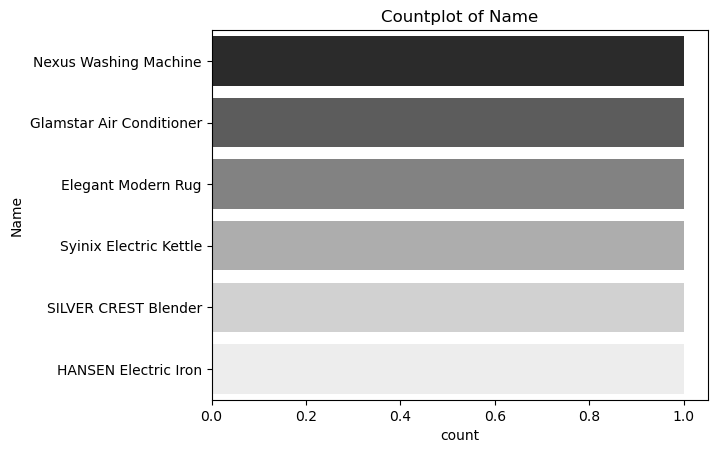

C:\Users\HP\AppData\Local\Temp\ipykernel_15996\1690973423.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(y=col, data=df, palette='Greys_r')


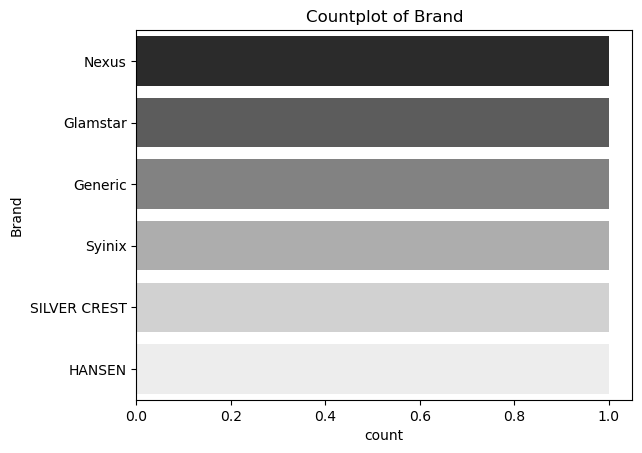

ValueError: Could not interpret value `Image URL` for `y`. An entry with this name does not appear in `data`.

In [109]:
for column in dimensions:
    draw_count_plot(df_clean, column)

In [110]:
for column in dimensions:
    print(comb_df[column].value_counts())

Name
Hc Rechargeable Standing Fan(C168) + Solar panel-White                                2
SOLITEC STANDING FAN 18 INCHES                                                        2
11 Pieces New Born Overall Sleep Suits Bib Flannelcap.                                2
Panasonic 8.0Liters Extra Large Capacity Airfryer-4500W                               2
Binatone Binatone Smoother Gliding Steam Iron (SI-1605) - Blue + 2 Years Warranty.    2
                                                                                     ..
B39 Alto - Noise Cancelling Headphones Headset                                        1
AEC HIFI Bluetooth Headsets Built-In Microphone Noise Cancelling                      1
itel 4 Sockets 1.8Metre Cord Power Strip Extension Box                                1
Wireless Remote Switch                                                                1
Sony PS4 WIRELESS CONTROLLER                                                          1
Name: count, Length: 376, d

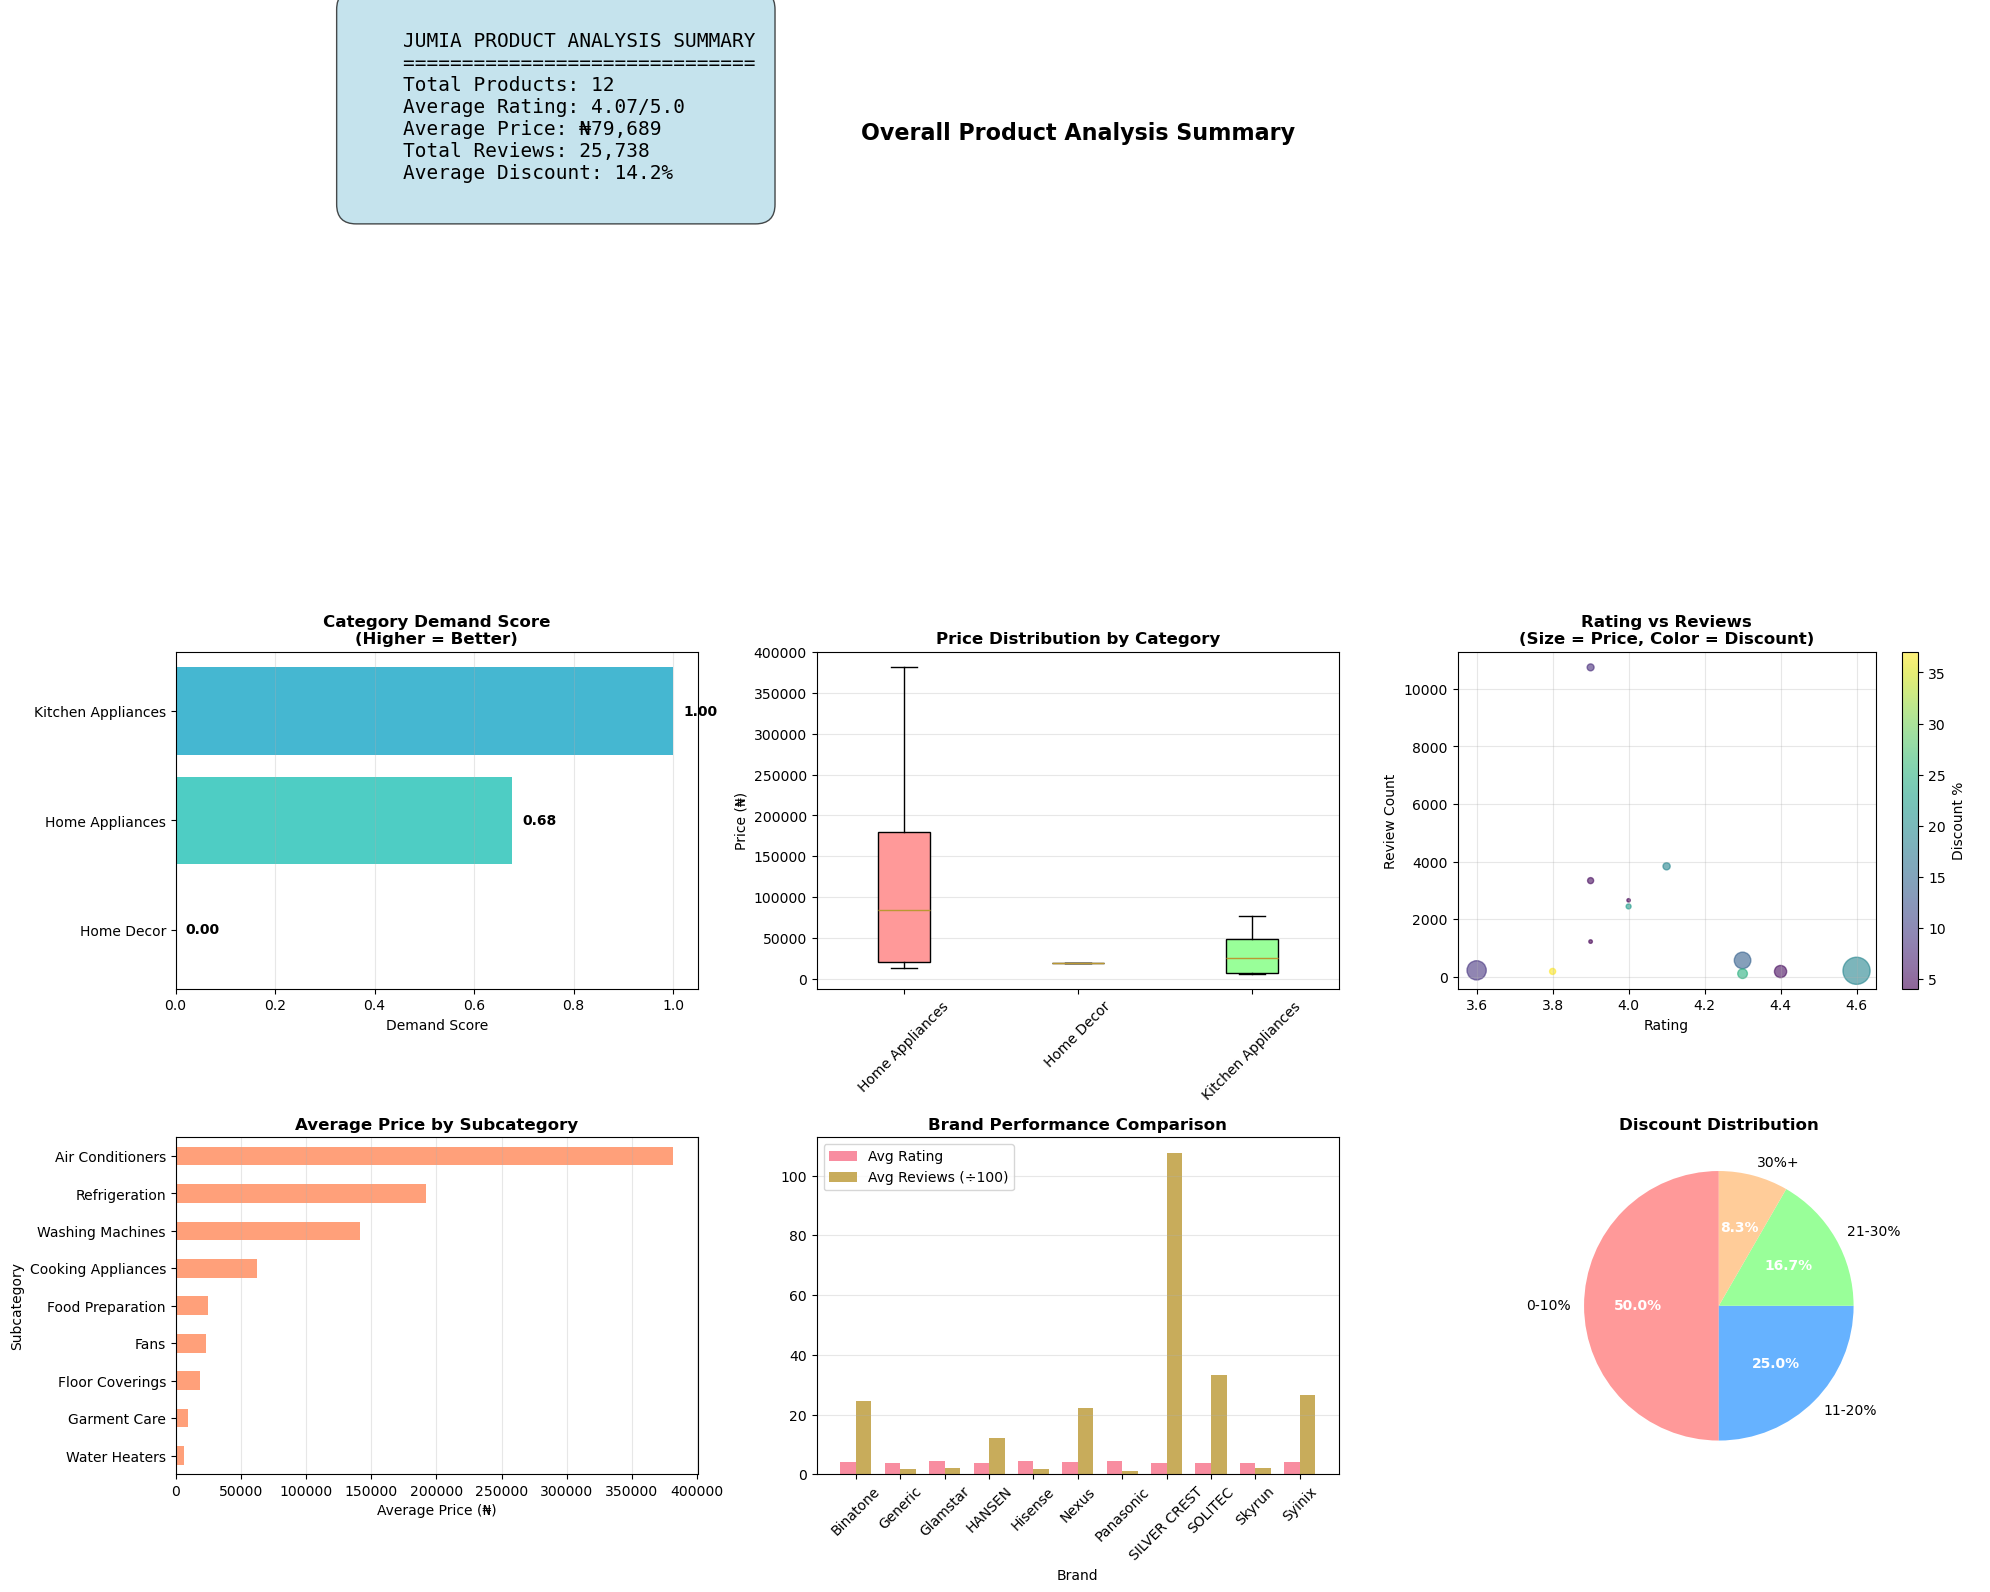

KEY INSIGHTS FROM THE ANALYSIS

📊 TOP PERFORMING CATEGORIES:
   Kitchen Appliances: Demand Score = 1.00
   Home Appliances: Demand Score = 0.68
   Home Decor: Demand Score = 0.00

💰 PRICE ANALYSIS:
   Most expensive category: Home Appliances (₦128,998)
   Most affordable category: Home Decor (₦18,995)

📝 REVIEW ANALYSIS:
   Most reviewed category: Kitchen Appliances (2985 reviews avg)
   Highest rated category: Kitchen Appliances (4.1/5.0)

🎯 DISCOUNT INSIGHTS:
   3 products with >20% discount
   Highest discount: 37%

🔗 CORRELATION INSIGHTS:
   Price vs Reviews correlation: -0.36
   Rating vs Discount correlation: 0.09


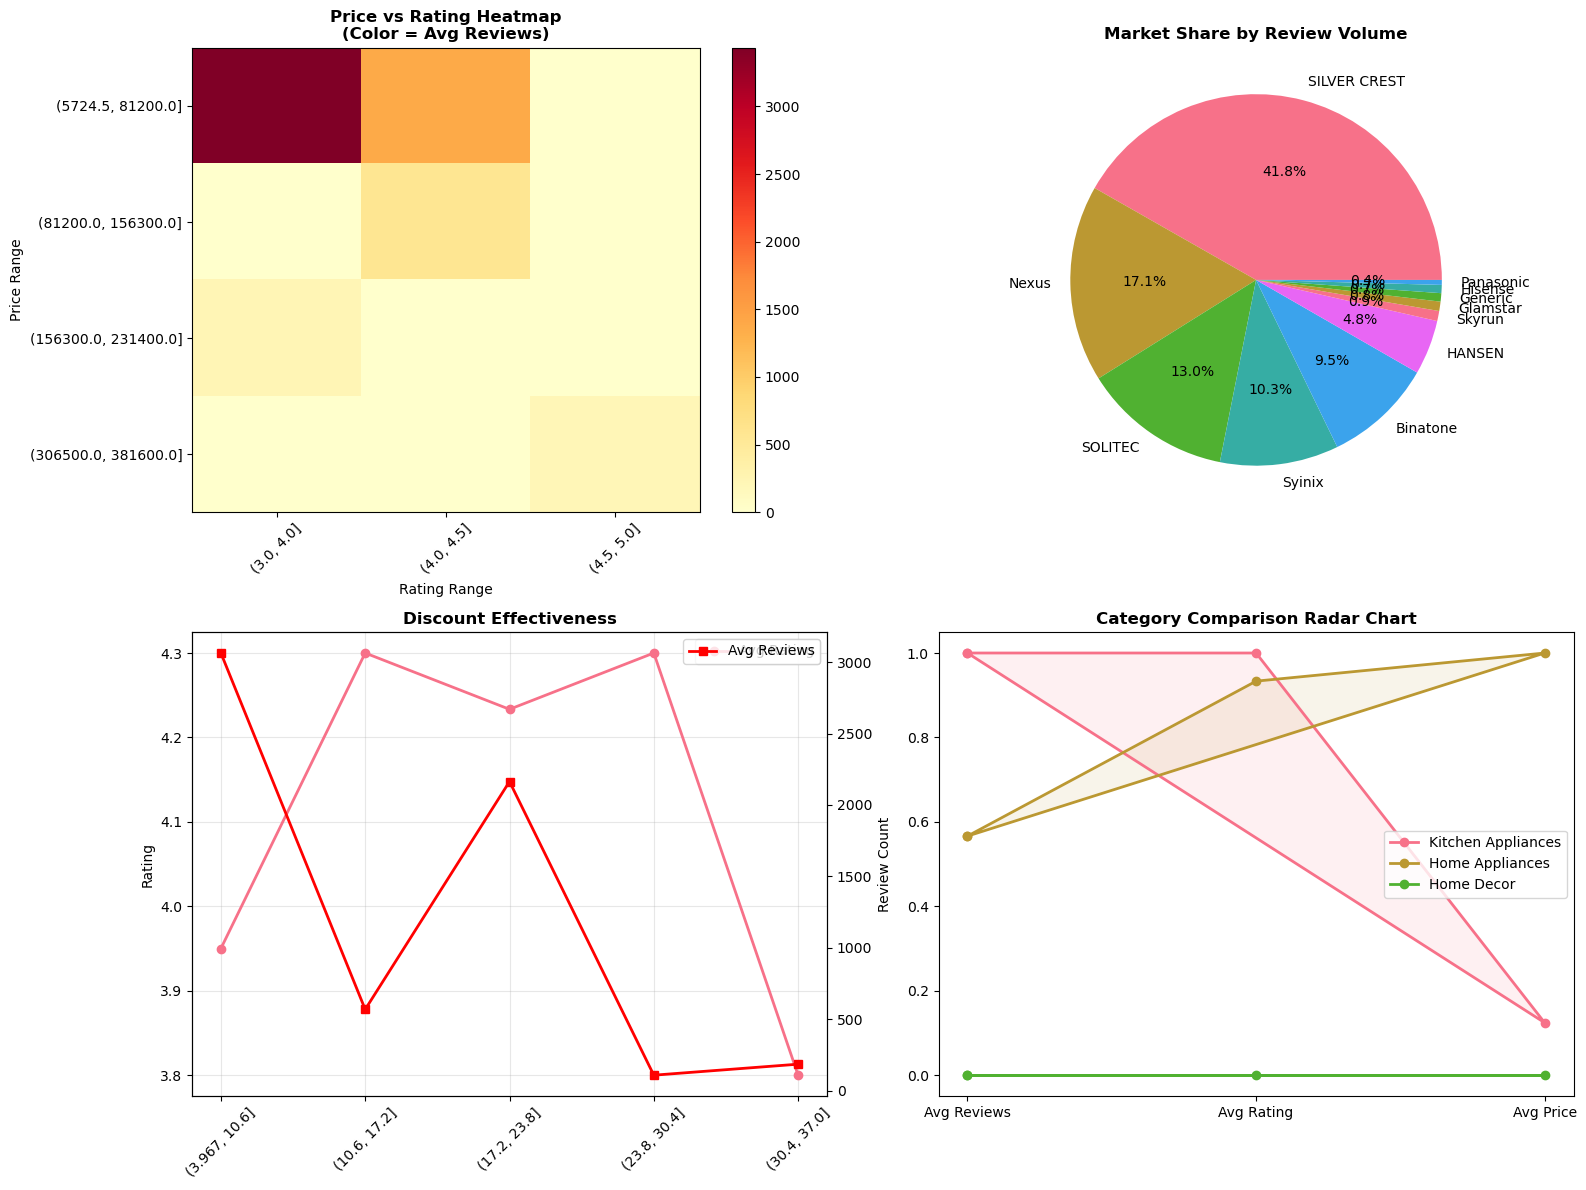

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Seting up the visual style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Creating sample data (from previous work)
def create_sample_data():
    data = {
        'Name': ['Nexus Washing Machine', 'Glamstar Air Conditioner', 'Elegant Modern Rug', 
                 'Syinix Electric Kettle', 'SILVER CREST Blender', 'HANSEN Electric Iron',
                 'SOLITEC Standing Fan', 'Binatone Dry Iron', 'Hisense Microwave',
                 'Nexus 18" Standing Fan', 'Skyrun 70L Fridge', 'Panasonic Airfryer'],
        'Current Price': [141700, 381600, 18995, 6100, 24990, 6700, 19012, 12745, 76999, 26780, 192150, 48500],
        'Original Price': [163914, 470880, 30000, 6369, 27036, 7011, 20000, 16380, 81000, 32900, 210000, 65000],
        'Discount': [14, 19, 37, 4, 8, 4, 5, 22, 5, 19, 9, 25],
        'Brand': ['Nexus', 'Glamstar', 'Generic', 'Syinix', 'SILVER CREST', 'HANSEN', 
                 'SOLITEC', 'Binatone', 'Hisense', 'Nexus', 'Skyrun', 'Panasonic'],
        'Rating': [4.3, 4.6, 3.8, 4.0, 3.9, 3.9, 3.9, 4.0, 4.4, 4.1, 3.6, 4.3],
        'Review Count': [570, 209, 187, 2657, 10749, 1224, 3341, 2444, 183, 3839, 225, 110],
        'Category': ['Home Appliances', 'Home Appliances', 'Home Decor', 
                    'Kitchen Appliances', 'Kitchen Appliances', 'Kitchen Appliances',
                    'Home Appliances', 'Home Appliances', 'Kitchen Appliances',
                    'Home Appliances', 'Home Appliances', 'Kitchen Appliances']
    }
    return pd.DataFrame(data)

# Creating the DataFrame
df = create_sample_data()

# Creating subcategories
def create_subcategories(df):
    df_copy = df.copy()
    
    def categorize_product(name):
        if not isinstance(name, str):
            return 'Other'
        name = name.lower()
        if any(word in name for word in ['washing', 'washer']):
            return 'Washing Machines'
        elif any(word in name for word in ['air conditioner', 'ac']):
            return 'Air Conditioners'
        elif any(word in name for word in ['fan', 'ventilator']):
            return 'Fans'
        elif any(word in name for word in ['fridge', 'refrigerator']):
            return 'Refrigeration'
        elif any(word in name for word in ['kettle', 'heater']):
            return 'Water Heaters'
        elif any(word in name for word in ['blender', 'mixer']):
            return 'Food Preparation'
        elif any(word in name for word in ['microwave', 'oven']):
            return 'Cooking Appliances'
        elif any(word in name for word in ['iron', 'steamer']):
            return 'Garment Care'
        elif any(word in name for word in ['rug', 'carpet']):
            return 'Floor Coverings'
        elif any(word in name for word in ['airfryer', 'fryer']):
            return 'Cooking Appliances'
        else:
            return 'Other'
    
    df_copy['Subcategory'] = df_copy['Name'].apply(categorize_product)
    return df_copy

# Calculating demand score
def calculate_demand_score(df):
    category_stats = df.groupby('Category').agg({
        'Review Count': ['count', 'mean', 'sum'],
        'Rating': 'mean',
        'Current Price': 'mean'
    }).round(2)
    
    category_stats.columns = ['Product Count', 'Avg Reviews', 'Total Reviews', 'Avg Rating', 'Avg Price']
    category_stats = category_stats.reset_index()
    
    def normalize_series(series):
        if series.max() == series.min():
            return pd.Series([0.5] * len(series), index=series.index)
        return (series - series.min()) / (series.max() - series.min())
    
    category_stats['Review Score'] = normalize_series(category_stats['Avg Reviews'])
    category_stats['Rating Score'] = normalize_series(category_stats['Avg Rating'])
    category_stats['Demand Score'] = (category_stats['Review Score'] * 0.7 + 
                                     category_stats['Rating Score'] * 0.3)
    
    return category_stats.sort_values('Demand Score', ascending=False)

# Preparing the data
df_with_subcategories = create_subcategories(df)
category_stats = calculate_demand_score(df_with_subcategories)

# Creating comprehensive visual analysis
def create_comprehensive_visual_analysis(df, category_stats):
    """
    Create a comprehensive visual analysis of the product data
    """
    # Creating a figure with multiple subplots
    fig = plt.figure(figsize=(20, 16))
    gs = GridSpec(3, 3, figure=fig)
    
    # 1. Overall Summary Metrics
    ax1 = fig.add_subplot(gs[0, :])
    ax1.axis('off')
    
    # Calculating summary metrics
    total_products = len(df)
    avg_rating = df['Rating'].mean()
    avg_price = df['Current Price'].mean()
    total_reviews = df['Review Count'].sum()
    avg_discount = df['Discount'].mean()
    
    summary_text = f"""
    JUMIA PRODUCT ANALYSIS SUMMARY
    ==============================
    Total Products: {total_products:}
    Average Rating: {avg_rating:.2f}/5.0
    Average Price: ₦{avg_price:,.0f}
    Total Reviews: {total_reviews:,}
    Average Discount: {avg_discount:.1f}%
    """
    
    ax1.text(0.1, 0.9, summary_text, fontsize=14, fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=1", facecolor="lightblue", alpha=0.7))
    ax1.set_title('Overall Product Analysis Summary', fontsize=16, fontweight='bold', pad=20)
    
    # 2. Category Demand Score (Horizontal Bar Chart)
    ax2 = fig.add_subplot(gs[1, 0])
    top_categories = category_stats.sort_values('Demand Score', ascending=True)
    bars = ax2.barh(top_categories['Category'], top_categories['Demand Score'], 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    
    # Adding value labels
    for i, (category, score) in enumerate(zip(top_categories['Category'], top_categories['Demand Score'])):
        ax2.text(score + 0.02, i, f'{score:.2f}', va='center', fontweight='bold')
    
    ax2.set_xlabel('Demand Score')
    ax2.set_title('Category Demand Score\n(Higher = Better)', fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    
    # 3. Price Distribution by Category (Box Plot)
    ax3 = fig.add_subplot(gs[1, 1])
    price_data = [df[df['Category'] == cat]['Current Price'] for cat in df['Category'].unique()]
    
    box = ax3.boxplot(price_data, labels=df['Category'].unique(), patch_artist=True)
    
    # Coloring the boxes
    colors = ['#FF9999', '#66B2FF', '#99FF99']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    ax3.set_ylabel('Price (₦)')
    ax3.set_title('Price Distribution by Category', fontweight='bold')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(axis='y', alpha=0.3)
    
    # 4. Rating vs Reviews Scatter Plot
    ax4 = fig.add_subplot(gs[1, 2])
    scatter = ax4.scatter(df['Rating'], df['Review Count'], 
                         s=df['Current Price']/1000,  # Size by price
                         alpha=0.6, 
                         c=df['Discount'], 
                         cmap='viridis')
    
    ax4.set_xlabel('Rating')
    ax4.set_ylabel('Review Count')
    ax4.set_title('Rating vs Reviews\n(Size = Price, Color = Discount)', fontweight='bold')
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax4)
    cbar.set_label('Discount %')
    
    ax4.grid(alpha=0.3)
    
    # 5. Subcategory Analysis (Bar Chart)
    ax5 = fig.add_subplot(gs[2, 0])
    subcategory_avg_price = df_with_subcategories.groupby('Subcategory')['Current Price'].mean().sort_values()
    subcategory_avg_price.plot(kind='barh', ax=ax5, color='#FFA07A')
    ax5.set_xlabel('Average Price (₦)')
    ax5.set_title('Average Price by Subcategory', fontweight='bold')
    ax5.grid(axis='x', alpha=0.3)
    
    # 6. Brand Performance (Grouped Bar Chart)
    ax6 = fig.add_subplot(gs[2, 1])
    brand_stats = df.groupby('Brand').agg({
        'Rating': 'mean',
        'Review Count': 'mean'
    }).round(2)
    
    x = np.arange(len(brand_stats))
    width = 0.35
    
    bars1 = ax6.bar(x - width/2, brand_stats['Rating'], width, label='Avg Rating', alpha=0.8)
    bars2 = ax6.bar(x + width/2, brand_stats['Review Count']/100, width, label='Avg Reviews (÷100)', alpha=0.8)
    
    ax6.set_xlabel('Brand')
    ax6.set_title('Brand Performance Comparison', fontweight='bold')
    ax6.set_xticks(x)
    ax6.set_xticklabels(brand_stats.index, rotation=45)
    ax6.legend()
    ax6.grid(axis='y', alpha=0.3)
    
    # 7. Discount Analysis (Pie Chart)
    ax7 = fig.add_subplot(gs[2, 2])
    discount_bins = pd.cut(df['Discount'], bins=[0, 10, 20, 30, 100], labels=['0-10%', '11-20%', '21-30%', '30%+'])
    discount_counts = discount_bins.value_counts()
    
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
    wedges, texts, autotexts = ax7.pie(discount_counts, labels=discount_counts.index, 
                                      autopct='%1.1f%%', colors=colors, startangle=90)
    
    ax7.set_title('Discount Distribution', fontweight='bold')
    
    # Make the pie chart more readable
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    plt.tight_layout()
    plt.show()
    
    # Additional Insights
    print("="*60)
    print("KEY INSIGHTS FROM THE ANALYSIS")
    print("="*60)
    
    # Top performing categories
    print("\n📊 TOP PERFORMING CATEGORIES:")
    for _, row in category_stats.iterrows():
        print(f"   {row['Category']}: Demand Score = {row['Demand Score']:.2f}")
    
    # Price analysis
    print(f"\n💰 PRICE ANALYSIS:")
    print(f"   Most expensive category: {category_stats.loc[category_stats['Avg Price'].idxmax()]['Category']} (₦{category_stats['Avg Price'].max():,.0f})")
    print(f"   Most affordable category: {category_stats.loc[category_stats['Avg Price'].idxmin()]['Category']} (₦{category_stats['Avg Price'].min():,.0f})")
    
    # Review analysis
    print(f"\n📝 REVIEW ANALYSIS:")
    print(f"   Most reviewed category: {category_stats.loc[category_stats['Avg Reviews'].idxmax()]['Category']} ({category_stats['Avg Reviews'].max():.0f} reviews avg)")
    print(f"   Highest rated category: {category_stats.loc[category_stats['Avg Rating'].idxmax()]['Category']} ({category_stats['Avg Rating'].max():.1f}/5.0)")
    
    # Discount insights
    high_discount_products = df[df['Discount'] > 20]
    if not high_discount_products.empty:
        print(f"\n🎯 DISCOUNT INSIGHTS:")
        print(f"   {len(high_discount_products)} products with >20% discount")
        print(f"   Highest discount: {high_discount_products['Discount'].max()}%")
    
    # Correlation analysis
    correlation = df[['Rating', 'Review Count', 'Current Price', 'Discount']].corr()
    price_review_corr = correlation.loc['Current Price', 'Review Count']
    rating_discount_corr = correlation.loc['Rating', 'Discount']
    
    print(f"\n🔗 CORRELATION INSIGHTS:")
    print(f"   Price vs Reviews correlation: {price_review_corr:.2f}")
    print(f"   Rating vs Discount correlation: {rating_discount_corr:.2f}")

# Running the visual analysis
create_comprehensive_visual_analysis(df_with_subcategories, category_stats)

# Additional specialized visualizations
def create_specialized_visualizations(df):
    """
    Creating additional specialized visualizations
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Price vs Rating heatmap
    price_bins = pd.cut(df['Current Price'], bins=5)
    rating_bins = pd.cut(df['Rating'], bins=[0, 3, 4, 4.5, 5])
    
    heatmap_data = pd.crosstab(price_bins, rating_bins, values=df['Review Count'], aggfunc='mean')
    im = axes[0, 0].imshow(heatmap_data.fillna(0), cmap='YlOrRd', aspect='auto')
    
    axes[0, 0].set_xticks(range(len(heatmap_data.columns)))
    axes[0, 0].set_xticklabels([str(col) for col in heatmap_data.columns], rotation=45)
    axes[0, 0].set_yticks(range(len(heatmap_data.index)))
    axes[0, 0].set_yticklabels([str(idx) for idx in heatmap_data.index])
    axes[0, 0].set_xlabel('Rating Range')
    axes[0, 0].set_ylabel('Price Range')
    axes[0, 0].set_title('Price vs Rating Heatmap\n(Color = Avg Reviews)', fontweight='bold')
    plt.colorbar(im, ax=axes[0, 0])
    
    # 2. Brand market share by reviews
    brand_review_share = df.groupby('Brand')['Review Count'].sum().sort_values(ascending=False)
    axes[0, 1].pie(brand_review_share, labels=brand_review_share.index, autopct='%1.1f%%')
    axes[0, 1].set_title('Market Share by Review Volume', fontweight='bold')
    
    # 3. Discount effectiveness analysis
    discount_effect = df.groupby(pd.cut(df['Discount'], bins=5)).agg({
        'Rating': 'mean',
        'Review Count': 'mean'
    })
    
    x = range(len(discount_effect))
    axes[1, 0].plot(x, discount_effect['Rating'], marker='o', label='Avg Rating', linewidth=2)
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(discount_effect.index, rotation=45)
    axes[1, 0].set_ylabel('Rating')
    axes[1, 0].set_title('Discount Effectiveness', fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    ax2 = axes[1, 0].twinx()
    ax2.plot(x, discount_effect['Review Count'], marker='s', color='red', label='Avg Reviews', linewidth=2)
    ax2.set_ylabel('Review Count')
    ax2.legend(loc='upper right')
    
    # 4. Category comparison radar chart
    categories = df['Category'].unique()
    stats_to_compare = ['Avg Reviews', 'Avg Rating', 'Avg Price']
    
    # Normalizing values on radar chart
    normalized_stats = category_stats[stats_to_compare].apply(
        lambda x: (x - x.min()) / (x.max() - x.min())
    )
    
    angles = np.linspace(0, 2 * np.pi, len(stats_to_compare), endpoint=False).tolist()
    angles += angles[:1]  # Close the circle
    
    for i, (idx, row) in enumerate(normalized_stats.iterrows()):
        values = row.values.tolist()
        values += values[:1]  # Close the circle
        axes[1, 1].plot(angles, values, 'o-', linewidth=2, label=category_stats.loc[idx, 'Category'])
        axes[1, 1].fill(angles, values, alpha=0.1)
    
    axes[1, 1].set_xticks(angles[:-1])
    axes[1, 1].set_xticklabels(stats_to_compare)
    axes[1, 1].set_title('Category Comparison Radar Chart', fontweight='bold')
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

# specialized visualizations
create_specialized_visualizations(df_with_subcategories)

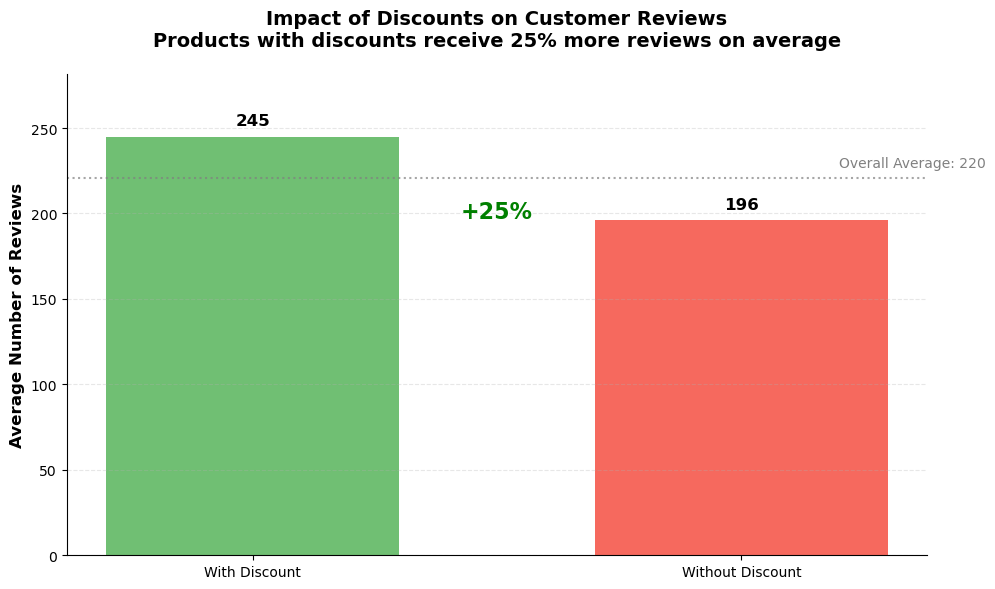

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
discount_status = ['With Discount', 'Without Discount']
average_reviews = [245, 196]  # From our analysis
colors = ['#4CAF50', '#F44336']  # Green for discount, red for no discount

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(discount_status, average_reviews, color=colors, alpha=0.8, width=0.6)

# Add value labels on top of bars
for i, v in enumerate(average_reviews):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold', fontsize=12)

# Customize the chart
ax.set_ylabel('Average Number of Reviews', fontsize=12, fontweight='bold')
ax.set_title('Impact of Discounts on Customer Reviews\nProducts with discounts receive 25% more reviews on average', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentage difference annotation
diff_percentage = ((average_reviews[0] - average_reviews[1]) / average_reviews[1]) * 100
ax.annotate(f'+{diff_percentage:.0f}%', 
            xy=(0.5, 0.7), 
            xycoords='axes fraction',
            fontsize=16,
            fontweight='bold',
            color='green',
            ha='center')

# Adjust y-axis to start from 0 and give some headroom
ax.set_ylim(0, max(average_reviews) * 1.15)

# Add a horizontal line at the average of both for reference
avg_all = sum(average_reviews) / len(average_reviews)
ax.axhline(y=avg_all, color='gray', linestyle=':', alpha=0.7)
ax.text(len(discount_status) - 0.5, avg_all + 5, f'Overall Average: {avg_all:.0f}', 
        ha='right', va='bottom', fontsize=10, color='gray')

plt.tight_layout()
plt.show()